# Optimize your Christmas Tree to Global Optimality
[![christmas_tree.ipynb](https://img.shields.io/badge/github-%23121011.svg?logo=github)](https://github.com/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb) [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb) [![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb) [![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb) [![Hits](https://h.ampl.com/https://github.com/ampl/colab.ampl.com/blob/master/authors/fdabrandao/global/christmas_tree.ipynb)](https://colab.ampl.com)

Description: Optimize the placement of ornaments on a christmas tree.  

Tags: christmas, amplpy, global-optimization, highlights

Notebook author: Filipe Brandão <<fdabrandao@gmail.com>>

In [1]:
# Install dependencies
%pip install -q amplpy matplotlib numpy pandas

In [2]:
# Google Colab & Kaggle integration
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["gurobi"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

## 🎅 Global Non-Linear Optimization

Global non-linear optimization involves finding the optimal solution for a
problem with multiple variables, where the objective function and constraints
are non-linear, and the aim is to discover the global maximum or minimum across
the entire feasible space. Unlike local optimization, which seeks the best
solution within a limited region, global optimization seeks the overall best
solution within the entire feasible domain, often requiring extensive exploration
of the solution space.

### Christmas 🎄 Problem

Optimize the placement of ornaments on a tree 🎄 so that
we maximize the minimum Euclidean or Manhattan distance between consecutive
ornaments. The following AMPL model optimizes the placement of ornaments on
a sinusoidal line in such a way that we maximize the minimum distance
between each of them. It can be solved for multiple lines in order to
decorate an entire tree. Use our [Steamlit App](https://ampl.com/streamlit/Global_Optimization) to optimize your christmas tree.

In [3]:
%%writefile christmas.mod
# Define parameters
param n;           # Number of ornaments
param width;       # Tree width
param height;      # Tree height
param offset;      # Offset of the sine function
param frequency;   # Frequency of the sine function
param sine_slope;  # Slope of the sine functions
param tree_slope :=  height / (width/2);  # Slope of the tree shape

# Define a set for the ornaments
set ORNAMENTS ordered := 1..n;  # Ordered set representing the ornaments

# Variables
var X{ORNAMENTS} >= 0 <= width;  # X-coordinate of each ornament within the specified width
var Y{i in ORNAMENTS} = sin(frequency * X[i]) + sine_slope * X[i] + offset;  # Y-coordinate using a sine function

# Objective functions
maximize MinEuclideanDistance:  # Objective: Maximize the minimum euclidean distance between consecutive ornaments
    min{i in ORNAMENTS: ord(i) > 1} sqrt((X[i] - X[i-1])^2 + (Y[i] - Y[i-1])^2);

maximize MinSquaredEuclideanDistance:  # Objective: Maximize the minimum squared euclidean distance between consecutive ornaments
    min{i in ORNAMENTS: ord(i) > 1} ((X[i] - X[i-1])^2 + (Y[i] - Y[i-1])^2);

maximize MinManhattanDistance:  # Objective: Maximize the minimum manhattan distance between consecutive ornaments
    min{i in ORNAMENTS: ord(i) > 1} (abs(X[i] - X[i-1]) + abs(Y[i] - Y[i-1]));

# Constraints
s.t. Order{i in ORNAMENTS: ord(i) > 1}:  # Ensure the ornaments are ordered from left to right
    X[i] >= X[i-1];

s.t. TreeShape{i in ORNAMENTS}:  # Constraints for the shape of the tree
    Y[i] <= min(tree_slope * X[i], tree_slope * (width - X[i]));

Overwriting christmas.mod


In [4]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import random
import math

## Load data common to all waves

In [5]:
height = 20
width = 0.4 * height
sine_slope = 0.7
frequency = 1

In [6]:
ampl = AMPL()
ampl.read("christmas.mod")
ampl.param["width"] = width
ampl.param["height"] = height
ampl.param["sine_slope"] = sine_slope
ampl.param["frequency"] = frequency

## Solve the problem for a wave with offset 0 and 3 ornaments

In [7]:
ampl.option["gurobi_options"] = "global=1 timelim=5 outlev=1"
ampl.param["n"] = 3
ampl.param["offset"] = 0
ampl.solve(solver="gurobi")
assert ampl.solve_result == "solved", ampl.solve_result

Gurobi 11.0.0:   alg:global (pre:funcnonlinear) = 1
  lim:time = 5
Set parameter LogToConsole to value 1
  tech:outlev = 1
Set parameter InfUnbdInfo to value 1
Set parameter FuncNonlinear to value 1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 14 rows, 23 columns and 34 nonzeros
Model fingerprint: 0xefb3c4f4
Model has 2 quadratic constraints
Model has 9 general constraints
Variable types: 23 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [7e-01, 5e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+02]
  RHS range        [4e+01, 4e+01]
Using branch priorities (all 0).
Presolve added 2 rows and 0 columns
Presolve removed 0 rows and 6 columns
Presolve time: 0.00s
Pres

Optimal coordinates for the ornaments:

In [8]:
solution = ampl.get_data("X, Y").to_pandas()
display(solution)

,X,Y
1,0.000000,0.000000
2,3.984966,2.042586
3,6.914061,5.429695


Plot ornaments on the wave:

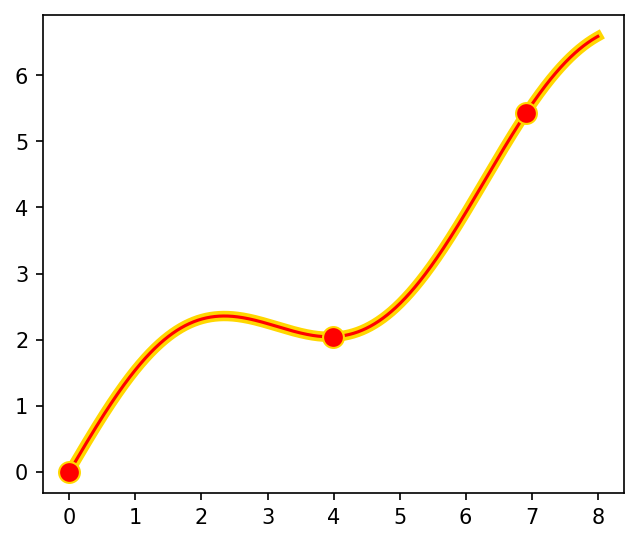

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150, facecolor="none")
fig.gca().set_aspect("equal", adjustable="box")
ax.set_facecolor("none")
x = np.linspace(0, width, 1000)
sin_line = np.sin(frequency * x) + sine_slope * x
# Plot line
ax.plot(
    x,
    sin_line,
    color="red",
    path_effects=[patheffects.withStroke(linewidth=5, foreground="gold")],
)
# Plot ornaments
ax.scatter(solution.X, solution.Y, color="red", edgecolor="gold", zorder=3, s=100)
fig.show()

## Optimize your Christmas 🎄 to Global Optimality!

Function to optimize each wave with `n` ornaments and an offset:

In [10]:
def solve(solver: str, objective: str, n: int, offset: float):
    ampl.param["n"] = n
    ampl.param["offset"] = offset
    ampl.option["solver"] = solver
    solve_output = ampl.get_output(f"solve {objective};")
    assert ampl.solve_result == "solved", ampl.solve_result
    return ampl.get_data("X, Y").to_pandas(), {
        "solve_result": ampl.solve_result,
        "solve_time": ampl.get_value("_solve_elapsed_time"),
        "objective_value": ampl.get_value(objective),
        "solver_output": solve_output,
    }

In [11]:
nlevels = 5
per_cycle = 2
tree_color = "green"
objective = "MinEuclideanDistance"
solver = "gurobi"

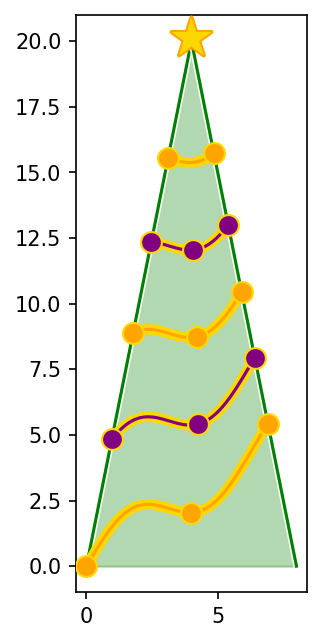

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150, facecolor="none")
fig.gca().set_aspect("equal", adjustable="box")
ax.set_facecolor("none")

width = ampl.get_value("width")
height = ampl.get_value("height")
tree_slope = ampl.get_value("tree_slope")
frequency = ampl.get_value("frequency")
sine_slope = ampl.get_value("sine_slope")

x = np.linspace(0, width, 1000)
tree_left = tree_slope * x
tree_right = tree_slope * (width - x)

# Draw the borders of the tree
x_line1 = np.linspace(0, width / 2, 1000)
ax.plot(
    x_line1,
    tree_slope * x_line1,
    color=tree_color,
    linestyle="-",
    path_effects=[patheffects.withStroke(linewidth=3, foreground="white")],
)
x_line2 = np.linspace(width / 2, width, 1000)
ax.plot(
    x_line2,
    tree_slope * (width - x_line2),
    color=tree_color,
    linestyle="-",
    path_effects=[patheffects.withStroke(linewidth=3, foreground="white")],
)

ax.text(
    width / 2,
    height,
    "★",
    fontsize=25,
    ha="center",
    va="center",
    color="gold",
    path_effects=[patheffects.withStroke(linewidth=2, foreground="orange")],
)

# Calculate the minimum values between the two functions
tree_y1 = tree_slope * x
tree_y2 = tree_slope * (width - x)
tree_y_min = np.minimum(tree_y1, tree_y2)
# Filling the area where values are smaller than both lines with green color
ax.fill_between(
    x,
    tree_y_min,
    where=(tree_y_min <= tree_y1) & (tree_y_min <= tree_y2),
    color=tree_color,
    alpha=0.3,
)

# Plot lines and ornaments
solve_info = {}
ornament_colors = ["red", "green", "blue", "orange", "purple", "white"]
ornament_colors = [color for color in ornament_colors if color != tree_color]
ornament_colors = random.sample(ornament_colors, 2)
for i in range(nlevels):
    offset = i * height / float(nlevels + 1)
    color = ornament_colors[i % len(ornament_colors)]

    # Plot lines
    sin_line = np.sin(frequency * x) + sine_slope * x + offset
    x_line = x[(sin_line < tree_left) & (sin_line < tree_right)]
    y_line = sin_line[(sin_line < tree_left) & (sin_line < tree_right)]
    if len(x_line) == 0:
        continue
    ax.plot(
        x_line,
        y_line,
        color=color,
        path_effects=[patheffects.withStroke(linewidth=5, foreground="gold")],
    )

    # Calculate number of ornaments
    total_length = np.max(x_line) - np.min(x_line)
    cycles = frequency * total_length / (2 * math.pi)
    n_ornaments = min(max(3, int(round(per_cycle * cycles))), 10)
    if i == nlevels - 1:
        n_ornaments = 2

    # Solve optimization problem
    solution, solve_info[i + 1] = solve(
        solver=solver,
        objective=objective,
        n=n_ornaments,
        offset=offset,
    )
    # Plot ornaments
    ax.scatter(
        solution.X,
        solution.Y,
        color=color,
        edgecolor="gold",
        zorder=3,
        s=100,
    )
fig.show()